In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("C:/Users/swast/Vehicle Co2 Emission Presiction/Fuel Consumption Ratings 2023.csv",encoding='ISO-8859-1')

In [10]:
df.head()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0


In [12]:
df.shape

(856, 15)

In [13]:
df.describe()

,Engine Size (L),Cylinders,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000
mean,3.147899,5.627851,12.431453,9.353661,11.047179,27.375750,257.471789,4.522209,5.236495
std,1.353076,1.968695,3.456191,2.302312,2.878308,7.559968,64.262847,1.279385,1.665693
min,1.200000,3.000000,4.400000,4.400000,4.400000,11.000000,104.000000,1.000000,1.000000
25%,2.000000,4.000000,10.100000,7.700000,9.000000,22.000000,211.000000,4.000000,5.000000
50%,3.000000,6.000000,12.100000,9.100000,10.700000,26.000000,254.000000,5.000000,5.000000
75%,3.600000,6.000000,14.600000,10.700000,12.900000,31.000000,299.000000,5.000000,7.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,64.000000,608.000000,9.000000,8.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        841 non-null    object 
 1   Make                        854 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non

In [15]:
df.isnull().sum()

Year                          15
Make                           2
Model                         23
Vehicle Class                 23
Engine Size (L)               23
Cylinders                     23
Transmission                  23
Fuel Type                     23
Fuel Consumption (L/100Km)    23
Hwy (L/100 km)                23
Comb (L/100 km)               23
Comb (mpg)                    23
CO2 Emissions (g/km)          23
CO2 Rating                    23
Smog Rating                   23
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df=df.drop(['Transmission','Make','Year','Vehicle Class','Model'],axis=1)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [21]:
categorical_columns = ['Fuel Type']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [22]:
df.head()

,Engine Size (L),Cylinders,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,1.5,4.0,3,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,1.5,4.0,3,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,1.5,4.0,3,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,3.5,6.0,3,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,3.0,6.0,3,13.8,11.2,12.4,23.0,291.0,4.0,5.0


In [23]:
X = df.drop(['CO2 Emissions (g/km)'],axis=1)
y = df['CO2 Emissions (g/km)']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 7.19
Mean Squared Error (MSE): 90.24
Root Mean Squared Error (RMSE): 9.50
R-squared (R2): 0.97


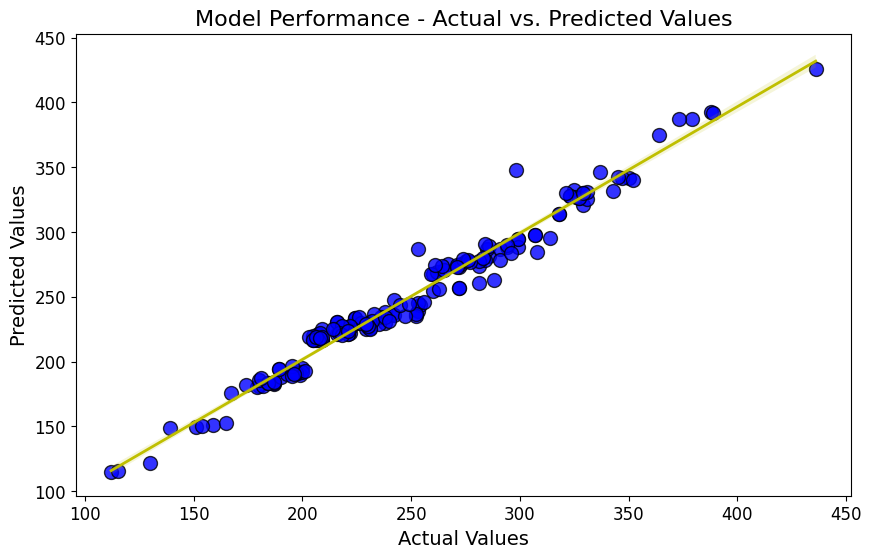

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.8, edgecolors='k', s=100)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='y', line_kws={"color": "y", "lw": 2})
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.title("Model Performance - Actual vs. Predicted Values", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()